# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


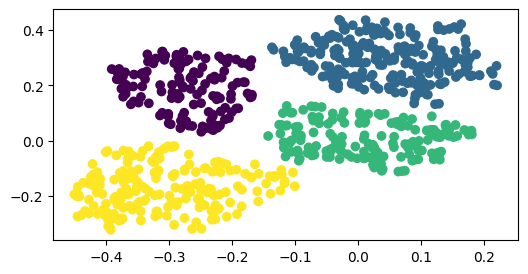

In [3]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [5]:
# PASO 1 elejir los medoides iniciales de forma randomica
def paso1_elije_medoides(K, Dx):
  # Elegimos los centros iniciales entre el conjunto de datos
  random_indices = np.random.choice(Dx.shape[0], K, replace=False)
  cDx = Dx[random_indices]
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[ 0.12991   0.280048]
 [-0.400218 -0.227168]
 [-0.413849 -0.113314]
 [-0.314209  0.200944]]


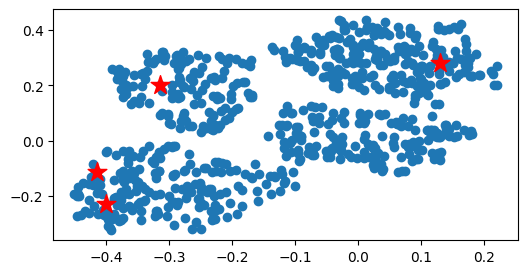

In [6]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [7]:
# Definimos la distancia euclidiana de una instancia x
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i], cDx)

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

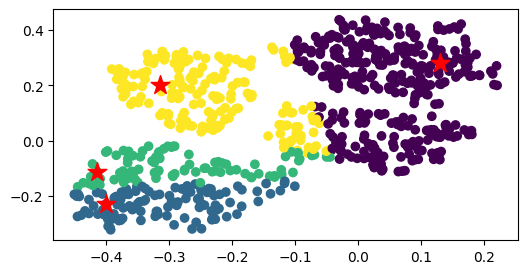

In [9]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [10]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # En este caso lo que buscamos es el elemento del cluster que reduce la
      # distancia con respecto a todos los demás elementos. Para ello, calculamos
      # las distancias entre todos los elementos del cluster `k` y las almacenamos
      # en `mat`.

      # Primero, obtenemos un vector binario indicando qué elementos de Dyp pertenecen a k
      indices_elementos_k = np.where(Dyp == k)[0]

      # Luego calculamos las distancias entre cada uno de los elementos de `Dx`
      # que nuestra predicción dice que pertenecen al custer `k` y los demás.

      # Only calculate distances if the cluster is not empty
      if len(indices_elementos_k) > 0:
          cluster_data = Dx[indices_elementos_k]
          mat = matriz_distancias(cluster_data, distancia_euclidiana)

          # Ahora buscamos el elemento con menor distancia dentro del
          # cluster `k` y nos quedamos con su índice (usando np.argmin, que busca
          # el mínimo de un vector y nos devuelve su índice).

          ic = np.argmin(np.sum(mat, axis=1))

          # Asignamos como centro del cluster al elemento del cluster que ofrece
          # la menor distancia con respecto a todos los demás
          cDx[k,:] = cluster_data[ic]
      # If cluster is empty, medoid remains the same or could be reinitialized (though not specified here)
  return cDx

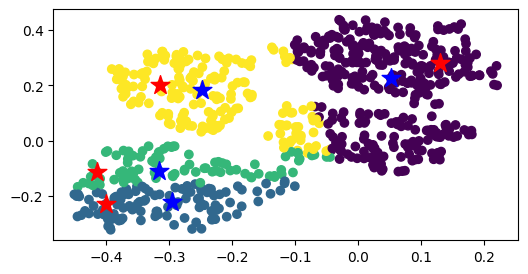

In [11]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [12]:
def MyKMedoide(Dx, K):
  cDx = paso1_elije_medoides(K, Dx)
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)
    # Calcular los nuevos centros
    cDx = paso3_actualiza_medoides(Dx, cDx, Dyp, K)
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

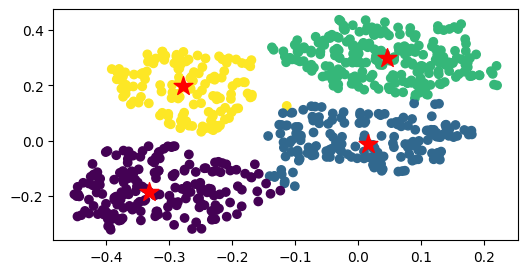

In [13]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


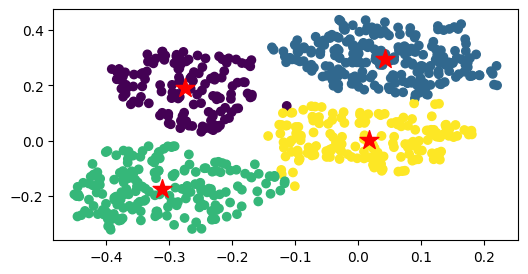

In [14]:
from sklearn.cluster import KMeans

modelo = KMeans(4, random_state=42, n_init=10) # Added random_state for reproducibility and n_init for best results
modelo.fit(Dx)
modelo.predict(Dx)
Dyp_sk = modelo.labels_
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Metrics for MyKMedoide
silhouette_kmedoids = silhouette_score(Dx, Dyp)
davies_bouldin_kmedoids = davies_bouldin_score(Dx, Dyp)

print(f"K-Medoids Metrics (K={K}):")
print(f"  Silhouette Score: {silhouette_kmedoids:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_kmedoids:.3f}")

# Metrics for KMeans++
silhouette_kmeans = silhouette_score(Dx, Dyp_sk)
davies_bouldin_kmeans = davies_bouldin_score(Dx, Dyp_sk)

print(f"\nK-Means++ Metrics (K={K}):")
print(f"  Silhouette Score: {silhouette_kmeans:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_kmeans:.3f}")

# Conclusion
print("\n--- Conclusion ---")
if silhouette_kmedoids > silhouette_kmeans:
    print("K-Medoids generally performed better based on Silhouette Score.")
elif silhouette_kmeans > silhouette_kmedoids:
    print("K-Means++ generally performed better based on Silhouette Score.")
else:
    print("Both algorithms performed similarly based on Silhouette Score.")

if davies_bouldin_kmedoids < davies_bouldin_kmeans:
    print("K-Medoids generally performed better based on Davies-Bouldin Index.")
elif davies_bouldin_kmeans < davies_bouldin_kmedoids:
    print("K-Means++ generally performed better based on Davies-Bouldin Index.")
else:
    print("Both algorithms performed similarly based on Davies-Bouldin Index.")

K-Medoids Metrics (K=4):
  Silhouette Score: 0.536
  Davies-Bouldin Index: 0.626

K-Means++ Metrics (K=4):
  Silhouette Score: 0.536
  Davies-Bouldin Index: 0.627

--- Conclusion ---
K-Means++ generally performed better based on Silhouette Score.
K-Medoids generally performed better based on Davies-Bouldin Index.


### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


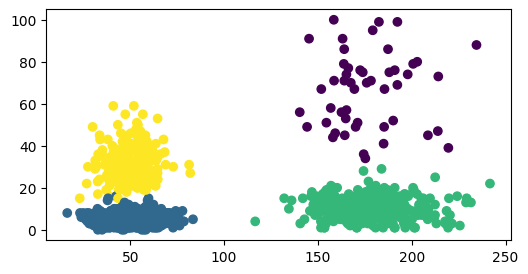

In [21]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

K-Means++ on new dataset:


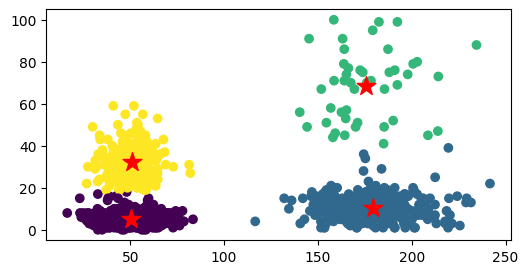

In [22]:
 ## aplica kMeans ++
modelo_new = KMeans(n_clusters=K, random_state=42, n_init=10)
modelo_new.fit(Dx)
Dyp_sk_new = modelo_new.labels_
cDx_sk_new = modelo_new.cluster_centers_

print('K-Means++ on new dataset:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk_new)
ax.scatter(cDx_sk_new[:,0],cDx_sk_new[:,1], marker='*', s=200, c='r')

K-Medoids on new dataset:

K-Medoids Metrics (K=4) on new dataset:
  Silhouette Score: 0.543
  Davies-Bouldin Index: 0.554

K-Means++ Metrics (K=4) on new dataset:
  Silhouette Score: 0.590
  Davies-Bouldin Index: 0.710

--- Conclusion for new dataset ---
K-Means++ generally performed better based on Silhouette Score.
K-Medoids generally performed better based on Davies-Bouldin Index.


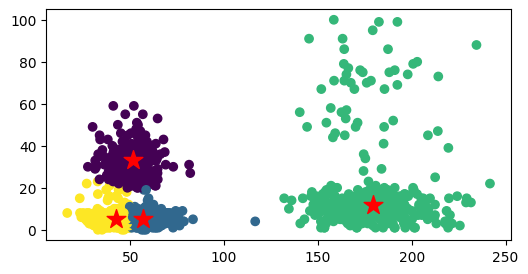

In [23]:
 ## aplica kMedoide
cDx_new, Dyp_new = MyKMedoide(Dx, K)

print('K-Medoids on new dataset:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_new)
ax.scatter(cDx_new[:,0],cDx_new[:,1], marker='*', s=200, c='r')


# Calculate and print metrics for the new dataset
silhouette_kmedoids_new = silhouette_score(Dx, Dyp_new)
davies_bouldin_kmedoids_new = davies_bouldin_score(Dx, Dyp_new)

print(f"\nK-Medoids Metrics (K={K}) on new dataset:")
print(f"  Silhouette Score: {silhouette_kmedoids_new:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_kmedoids_new:.3f}")

silhouette_kmeans_new = silhouette_score(Dx, Dyp_sk_new)
davies_bouldin_kmeans_new = davies_bouldin_score(Dx, Dyp_sk_new)

print(f"\nK-Means++ Metrics (K={K}) on new dataset:")
print(f"  Silhouette Score: {silhouette_kmeans_new:.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_kmeans_new:.3f}")

print("\n--- Conclusion for new dataset ---")
if silhouette_kmedoids_new > silhouette_kmeans_new:
    print("K-Medoids generally performed better based on Silhouette Score.")
elif silhouette_kmeans_new > silhouette_kmedoids_new:
    print("K-Means++ generally performed better based on Silhouette Score.")
else:
    print("Both algorithms performed similarly based on Silhouette Score.")

if davies_bouldin_kmedoids_new < davies_bouldin_kmeans_new:
    print("K-Medoids generally performed better based on Davies-Bouldin Index.")
elif davies_bouldin_kmeans_new < davies_bouldin_kmedoids_new:
    print("K-Means++ generally performed better based on Davies-Bouldin Index.")
else:
    print("Both algorithms performed similarly based on Davies-Bouldin Index.")

# 🚀 ¡TALLER FINALIZADO!"